In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

## using sklearn datasets

In [2]:

data = sklearn.datasets.load_iris()

# we get the data in numpy format: as dictionary
# data: contains all feature data (input data)
# target : target data (output data)
# feature_names : columns of features
# target_names : column names of target
#---------------------------------------------------------------

# Read the dataframe 
df_iris = pd.DataFrame(data.data,columns = data.feature_names) # we get only input data columns
df_iris['species'] = data.target    # adding the species column

df_iris[:3]

# now our dataframe is ready

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
# description of dataset

print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

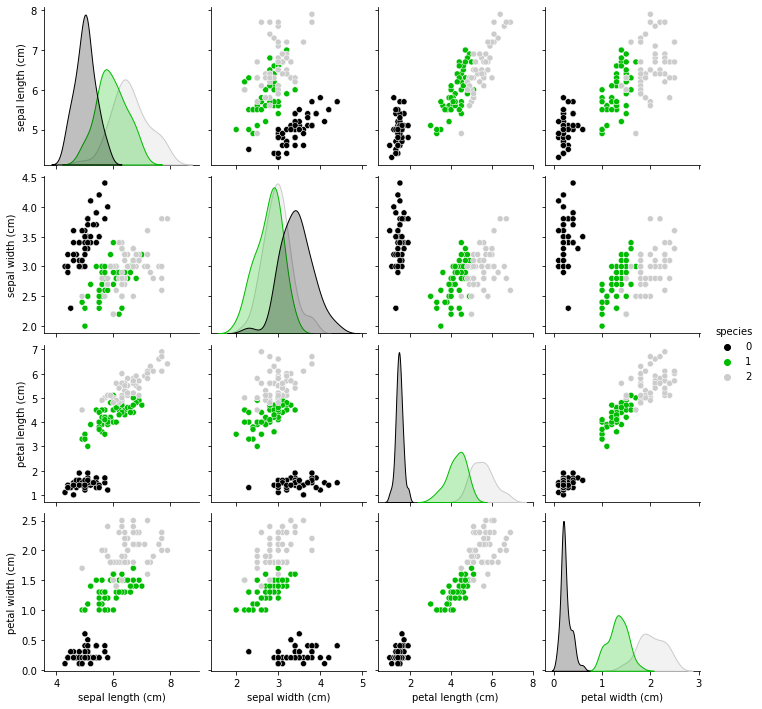

In [7]:
sns.pairplot(data=df_iris, hue='species',palette='nipy_spectral')

# below we can see that petal width and petal length as highly correlated

# Problem statement: Predict the species of iris flower

In [8]:
df_iris[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
# input data

X = df_iris.iloc[:,:4]
X[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
# output data

y = df_iris['species']
y[:2]

0    0
1    0
Name: species, dtype: int32

In [11]:
# splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# training

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# prediction

y_pred = model.predict(X_test)
y_pred

array([ 1.23071715, -0.04010441,  2.21970287,  1.34966889,  1.28429336,
        0.02248402,  1.05726124,  1.82403704,  1.36824643,  1.06766437,
        1.70031437, -0.07357413, -0.15562919, -0.06569402, -0.02128628,
        1.39659966,  2.00022876,  1.04812731,  1.28102792,  1.97283506,
        0.03184612,  1.59830192,  0.09450931,  1.91807547,  1.83296682,
        1.87877315,  1.78781234,  2.03362373,  0.03594506,  0.02619043])

### Performance

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
#MAE
mean_absolute_error(y_test,y_pred)

0.1463769496530853

In [17]:
#MSE
mean_squared_error(y_test,y_pred)

0.03711379440797688

In [18]:
#SMSE
from math import sqrt

sqrt(mean_squared_error(y_test,y_pred))

0.1926494080135646

In [19]:
#r2_score
r2_score(y_test,y_pred)*100

94.68960016420044

In [20]:
df_iris[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [21]:
#checking for accuracy: for 0 i.e. setosa

model.predict([[4.9,3.0,1.4,0.2]])[0]

C:\Users\pruthvi katware\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-0.030448014758287567

In [22]:
0-(-0.030448014758287567)

0.030448014758287567

### Working on actual values and predicted values

In [23]:
test = X_test.copy()
test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3


In [24]:
test['actual'] = y_test
test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2


In [25]:
test['predicted'] = y_pred
test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual,predicted
73,6.1,2.8,4.7,1.2,1,1.230717
18,5.7,3.8,1.7,0.3,0,-0.040104
118,7.7,2.6,6.9,2.3,2,2.219703


In [26]:
#error = actual-predicted
error = test.actual-test.predicted
error
test['error'] = error
test[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual,predicted,error
73,6.1,2.8,4.7,1.2,1,1.230717,-0.230717
18,5.7,3.8,1.7,0.3,0,-0.040104,0.040104
118,7.7,2.6,6.9,2.3,2,2.219703,-0.219703


## absolute and rounding the predicted values to check whether the prediction fro speacies os correct

### Species :- >> round(abs(model.predict([[sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)]])[0]))

In [27]:
df_iris.groupby('species').get_group(0)[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [28]:
round(abs(model.predict([[5.1,3.5,1.4,0.2]])[0]))

C:\Users\pruthvi katware\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0

In [29]:
df_iris.groupby('species').get_group(1)[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [30]:
round(abs(model.predict([[6.9,3.1,4.9,1.5]])[0]))

C:\Users\pruthvi katware\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1

In [31]:
df_iris.groupby('species').get_group(2)[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


In [32]:
round(abs(model.predict([[5.8,2.7,5.1,1.9]])[0]))

C:\Users\pruthvi katware\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2